# Лабораторна робота №4 з Видобування даних
## Моделювання
### Мета роботи: навчитися базовому фунукціоналу sckit learn для тренування простих моделей
### В рамках першої лабораторної роботи з етапу моделювання ми будемо працювати з простішими варіантами алгоритмів: [регресія](https://scikit-learn.org/stable/modules/linear_model.html) (може бути на ваш вибір), [дерева рішень](https://scikit-learn.org/stable/modules/tree.html), [ k-nearest neighbours](https://scikit-learn.org/stable/modules/neighbors.html) для класифікації та [k-means](https://scikit-learn.org/stable/modules/clustering.html) для кластеризації. 


### Туторіали по темі : [лінійної регресії](https://stackabuse.com/linear-regression-in-python-with-scikit-learn) , [дерев рішень](https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d) , [nearest neighbours](https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75) , [k-means](https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c) (якщо стаття перекривається повідомленням відкрийте її в приватній вкладці)

###1.[Завантажте набір даних у колаб](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92), і у data frame 

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/brych126/DataMining/main/Datasets/movies_cleaned.csv'
dataset = pd.read_csv(url, encoding='latin-1')
dataset.head() 

,budget,company,country,director,genre,gross,name,released,runtime,score,star,votes,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,8/22/1986,89,8.1,Wil Wheaton,299174,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,6/11/1986,103,7.8,Matthew Broderick,264740,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,5/16/1986,110,6.9,Tom Cruise,236909,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,7/18/1986,137,8.4,Sigourney Weaver,540152,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,8/1/1986,90,6.9,Joey Cramer,36636,1986


### 2. Використатйте метод [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) для того щоб отримати набір для тренування і тестування моделі

In [101]:
from sklearn.model_selection import train_test_split
x1 = dataset[['budget', 'runtime', 'gross']]
y1 = dataset['score']
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=0)
print('Data was split to train and test sets\nTrain set size:',len(x_train),'\nTest set size:', len(x_test))

Data was split to train and test sets
Train set size: 636 
Test set size: 160


###2.Оберіть 2 методи які би хотіли викорситати для ваших даних - наведіть приклади щоб ви хотіли за допомогою них отримати та аргументуйте чому обрали їх (не конкретний алгоритм а задачу класифікації / кластеризації / регресії )


###3.Використайте обидва методи на своїх даних натренувавши модель. Наведіть метрики після тренування на вашх тестових даних
 

In [102]:
#Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
492,6.0,5.936409
175,8.2,7.171356
529,6.6,7.907421
618,8.1,7.046126
558,5.3,5.837491
...,...,...
643,7.9,5.599253
235,7.6,6.031461
419,6.6,6.235395
76,5.9,6.338694


In [66]:
coeff_df = pd.DataFrame(regressor.coef_, x1.columns, columns=['Coefficient'])
coeff_df

,Coefficient
budget,-2.209017e-08
runtime,2.512341e-02
gross,8.738682e-09


In [67]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7111588178890816
Mean Squared Error: 0.9326933996018795
Root Mean Squared Error: 0.965760529117793


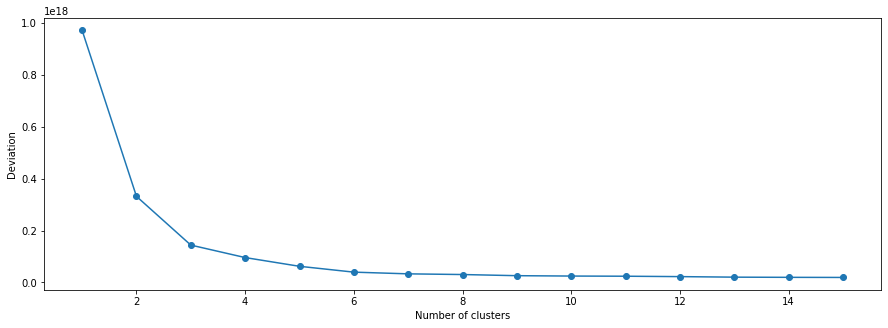

In [89]:
#Clustering
from sklearn.cluster import KMeans
x_cluster = list(zip(dataset['score'], dataset['gross']))
deviation_values = []
k_range = range(1,16)
for k in k_range:
  km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
  km.fit(x_cluster)
  deviation_values.append(km.inertia_)
plt.figure(figsize=[15,5])
plt.plot(k_range, deviation_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Deviation')
plt.show()



###4.Чи є можливість покращити метрики змінивши параметри моделі та її параметри тренування ? Або за допомогою зміни / трансформації даних ? Проведіть оновлене тренування де ваші метрики покращаться


In [91]:
#Regression
from sklearn.model_selection import train_test_split
x2 = dataset[['budget', 'runtime', 'gross']]
y2 = dataset['score']
for index, row in x2.iterrows():
    if row['gross'] < row['budget'] * 1.5:
      y2[index] -= 0.05
    elif row['gross'] < row['budget'] * 1.5:
      y2[index] = y2[index]
    else:
      y2[index] += 0.05
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=0)
print('Data was split to train and test sets\nTrain set size:',len(x_train),'\nTest set size:', len(x_test))
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train2, y_train2)
y_pred2 = regressor.predict(x_test2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

Data was split to train and test sets
Train set size: 636 
Test set size: 160
Mean Absolute Error: 0.7315679178653528
Mean Squared Error: 0.9699632067545263
Root Mean Squared Error: 0.9848671010621313


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

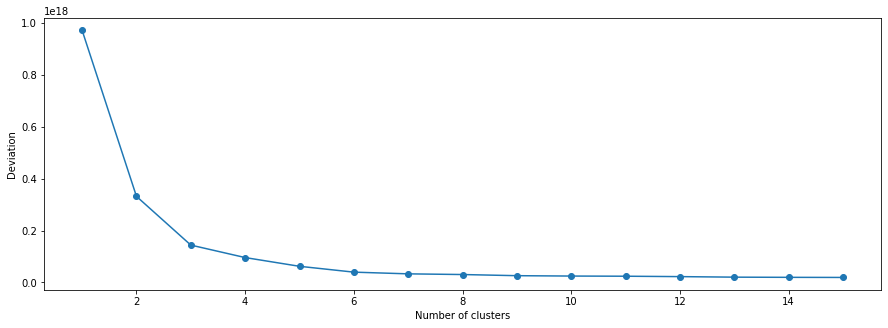

In [97]:
#Clustering
x_cluster_r = list(zip(round(dataset['score']), dataset['gross']))
deviation_values_r = []
for k in k_range:
  km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
  km.fit(x_cluster_r)
  deviation_values_r.append(km.inertia_)
  plt.figure(figsize=[15,5])
plt.plot(k_range, deviation_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Deviation')
plt.show()
 


###5.Застосуйте вашу модель на одному окремому прикладі з датасету. Що вона вертає у відповідь , що значить даний повернений обєкт або тип ?



In [103]:
#Regression
#Look above

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


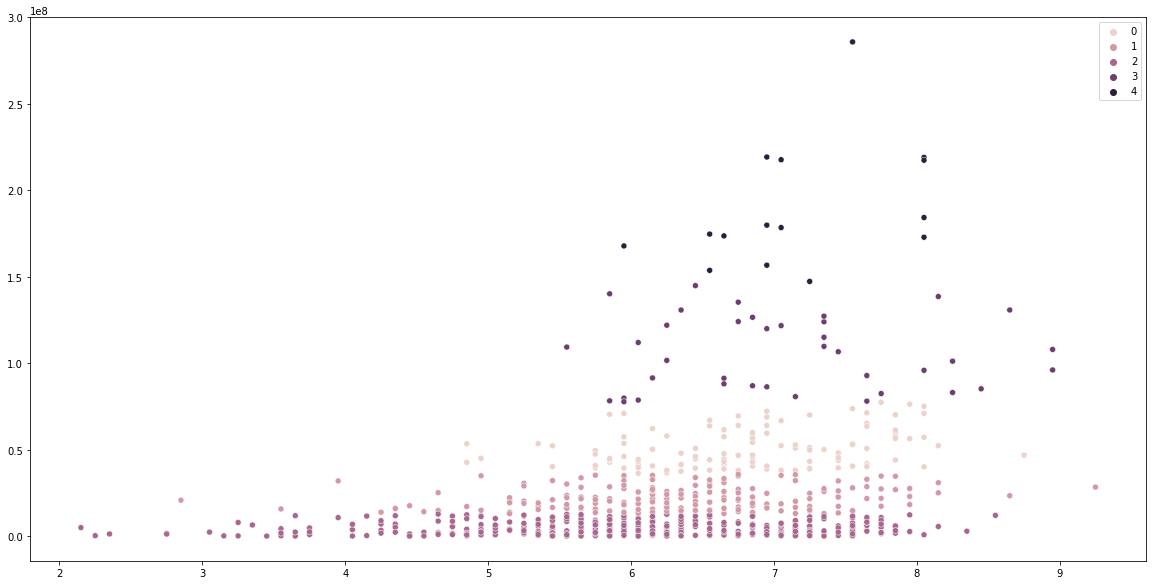

In [99]:
#Clustering
km = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
km.fit(x_cluster)
plt.figure(figsize=[20,10])
sns.scatterplot([i[0] for i in x_cluster], [i[1] for i in x_cluster], hue=km.labels_)
